# Fit Analysis

### We will use this notebook to analyze the model parameters across cells for the full model fits to the sfMix experiments

In [55]:
import numpy as np
import helper_fcns as hfunc
from scipy.stats.mstats import gmean
import autoreload
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('paul_plt_style.mplstyle')
import matplotlib.backends.backend_pdf as pltSave
%matplotlib inline

# save_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/altExp/analysis/figures/'; # personal mac
# data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/altExp/analysis/structures/'; # personal mac
save_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Figures/'; # personal mac
data_loc = '/Users/paulgerald/work/sfDiversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # personal mac
# save_loc = '/users/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Figures/'; # CNS
# data_loc = '/users/plevy/SF_diversity/sfDiv-OriModel/sfDiv-python/Analysis/Structures/'; # CNS
expName = 'dataList.npy';
fitName = 'fitList_180521_poiss.npy';
# fitName = 'fitList_180521_modPoiss_restrictLB.npy';
#descrName = 'descrFits.npy';
#descrModName = 'descrFitsModel.npy';


In [56]:
fits = np.load(data_loc + fitName, encoding='latin1').item();

What are the parameters? And in what order do they appear?

In [57]:
# 00 = preferred spatial frequency   (cycles per degree)                                                                                                                                                
# 01 = derivative order in space                                                                                                                                                                        
# 02 = normalization constant        (log10 basis)                                                                                                                                                      
# 03 = response exponent                                                                                                                                                                                
# 04 = response scalar                                                                                                                                                                                  
# 05 = early additive noise                                                                                                                                                                             
# 06 = late additive noise                                                                                                                                                                              
# 07 = variance of response gain                                                                                                                                                                        

# normTypeArr should be [0 or 1 or 2, *params]                                                                                                                                                          
# if normTypeArr[0] = 0                                                                                                                                                                                 
#   08 = asymmetry of normalization                                                                                                                                                                     
#   normTypeArr = [0, [inhAsym]]                                                                                                                                                                        
# if normTypeArr[0] = 1 (Gaussian weights)                                                                                                                                                              
#   08 = mean of Gaussian                                                                                                                                                                               
#   09 = std of Gaussian                                                                                                                                                                                
#   normTypeArr = [1, [mean], [std]]                                                                                                                                                                    
# if normTypeArr[0] = 2 (freq-dep c50)                                                                                                                                                                  
#   08 = std of left half (rel. to peak)                                                                                                                                                                
#   09 = std of right half (rel. to peak)                                                                                                                                                               
#   10 = offset (i.e. what is c50 at peak sensitivity, where c50 is lowest)                                                                                                                             
#   normTypeArr = [2, [offset], [leftSigma], [rightSigma]]         

In [58]:
paramNames = ['pref SF', 'derivative order', 'normalization const', 'resp exp', 'resp scalar', 'noise early', 'noise late', \
         'variance of gain','c50 filter baseline', 'std left', 'std right'];
ylabel = ['sf (cpd)', 'a.u.', 'contrast-ish', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'a.u.', 'contrast (%)', 'cpd', 'cpd'];
nParams = len(paramNames);

"Trajectory" of all parameters across cell

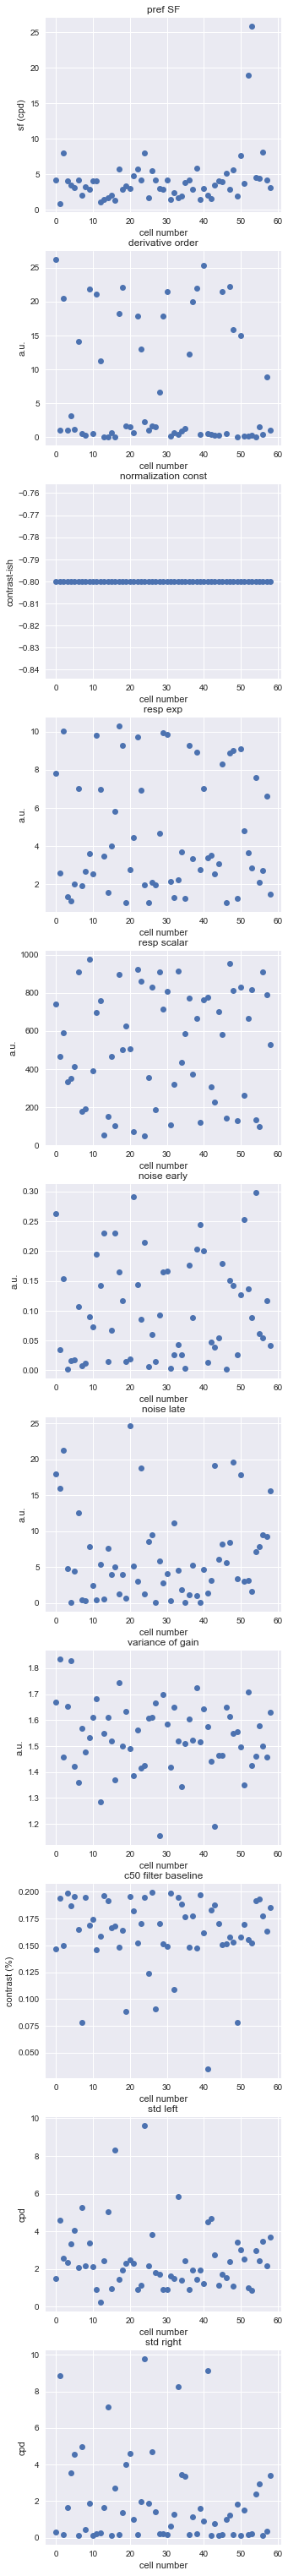

In [59]:
f, ax = plt.subplots(nParams, 1, figsize=(5, 5*nParams));
for i in range(nParams):
    currParams = [fits[x]['params'][i] for x in fits];
    plt.subplot(nParams, 1, i+1);
    plt.plot(range(len(currParams)), currParams, 'o')
    plt.title('%s' % (paramNames[i]))
    plt.ylabel('%s' % (ylabel[i]))
    plt.xlabel('cell number')

Histograms of values by parameter

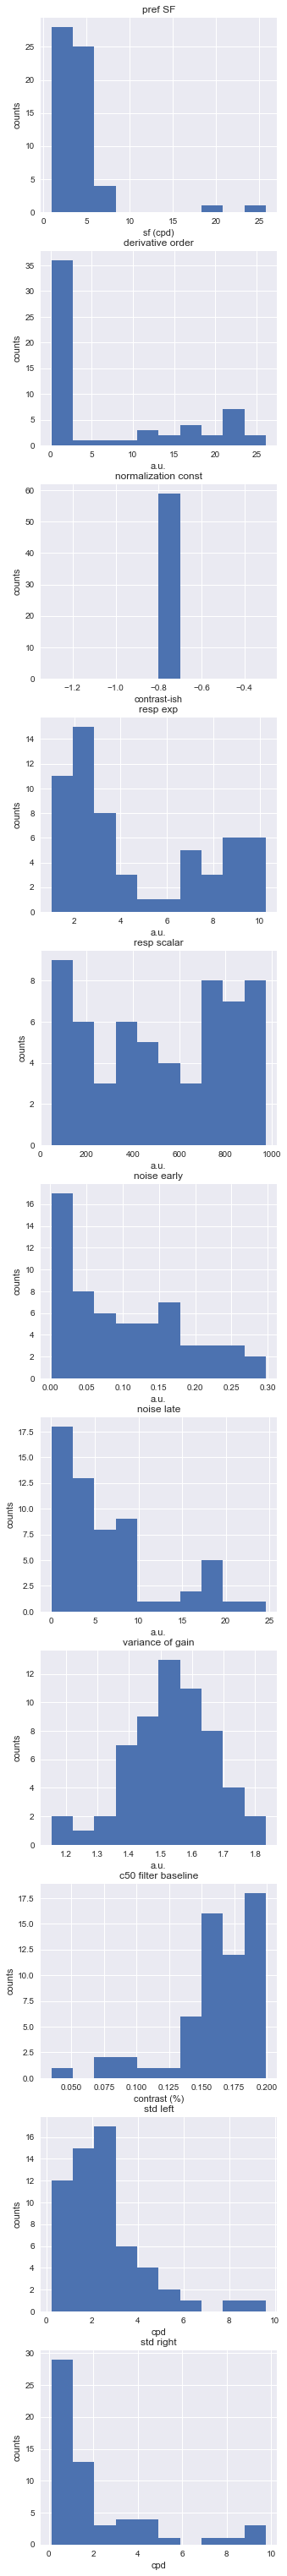

In [60]:
f, ax = plt.subplots(nParams, 1, figsize=(5, 5*nParams));
for i in range(nParams):
    currParams = [fits[x]['params'][i] for x in fits];
    plt.subplot(nParams, 1, i+1);
    plt.hist(currParams)
    plt.title('%s' % (paramNames[i]))
    plt.xlabel('%s' % (ylabel[i]))
    plt.ylabel('counts')